In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de la Yerba Mate**

Iniciamos analizando los precios de los productos de Yerba Mate dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [19]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('yerba', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
158,109,7790710334641,True,YERBA MATE SILUETA NARNJA CBSE CORMILLOT X 500...,1.0,UNI,CBSE,1699.0,3398.0,500.0,GRM,NaN,NaN,NaN,NaN,-1.486396,2,La Plata I,Supermercado,-34.913497,-57.951821,NaN,La Plata,Buenos Aires,Market,La Plata - Buenos Aires,5218
171,7,7790710334689,True,YERBA MATE HIERBAS CUYANAS CBSE X 500 GRS,1.0,UNI,CBSE,1699.0,3398.0,500.0,GRM,NaN,NaN,NaN,NaN,-0.500690,1,Quilmes,Hipermercado,-34.735911,-58.277988,NaN,Quilmes,Buenos Aires,Hipermercado Carrefour,Quilmes - Buenos Aires,5221
489,134,7790387014624,True,YERBA MATE SUAVE ORIG CONTROL UNION X 500GRS,1.0,UNI,UNION,2500.0,5000.0,500.0,GRM,NaN,NaN,NaN,NaN,-0.264211,2,Tandil II,Supermercado,-37.326474,-59.135087,NaN,Tandil,Buenos Aires,Market,Tandil - Buenos Aires,4383
512,219,7792710000106,True,YERBA MATE SELECCION ESPECIAL AMANDA X 1 KG,1.0,UNI,AMANDA,4125.0,4125.0,1000.0,GRM,NaN,NaN,NaN,NaN,-0.969752,1,Caballito,Hipermercado,-34.611087,-58.460584,NaN,Ciudad Autónoma de Buenos Aires,CABA,Hipermercado Carrefour,Ciudad Autónoma de Buenos Aires - CABA,8949
535,56,7790387013504,True,YERBA MATE SIN PALO 4FLEX TARAGUI X 500 GRS,1.0,UNI,TARAGUI,2940.0,5880.0,500.0,GRM,NaN,NaN,NaN,NaN,-0.233345,1,Glew,Hipermercado,-34.883091,-58.388230,NaN,Glew,Buenos Aires,Hipermercado Carrefour,Glew - Buenos Aires,4376


<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 158 to 848987
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           10638 non-null  category
 1   id_producto                           10638 non-null  category
 2   productos_ean                         10638 non-null  bool    
 3   productos_descripcion                 10638 non-null  object  
 4   productos_cantidad_presentacion       10638 non-null  float64 
 5   productos_unidad_medida_presentacion  10638 non-null  category
 6   productos_marca                       10638 non-null  category
 7   productos_precio_lista                10638 non-null  float64 
 8   productos_precio_referencia           10638 non-null  float64 
 9   productos_cantidad_referencia         10638 non-null  float64 
 10  productos_unidad_medida_referencia    10638 non-null  category
 11  prod

None

In [20]:
productos_df["id_producto"].nunique()

126

In [21]:
productos_df["id_producto"].value_counts().loc[lambda x: x > 0]

id_producto
7790387014624    126
7791720024782    126
7790387015317    126
7791720026335    126
7792280005709    126
                ... 
7793704000508     19
7730241003647      4
7730241003654      2
7730241009038      1
7730241009113      1
Name: count, Length: 126, dtype: int64

De la última celda podemos analizar que hay productos que estan en todos los tipos de comercio y otros que no.

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [22]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 53


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_70348/3562760019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


### **Análisis de Outliers**

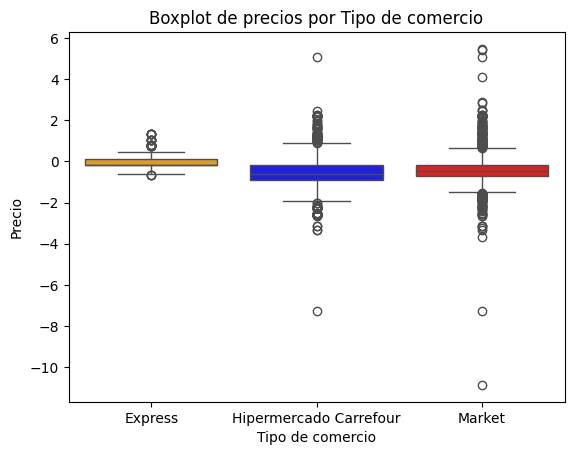

In [23]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [24]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_70348/1922502756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_70348/1922502756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', 

Volvemos a filtrar los productos que están en los 3 tipos de comercio ya que al eliminar outliers se pudo producir que algún producto no esté en todos estos tipos.

In [25]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 48


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_70348/1613971439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()


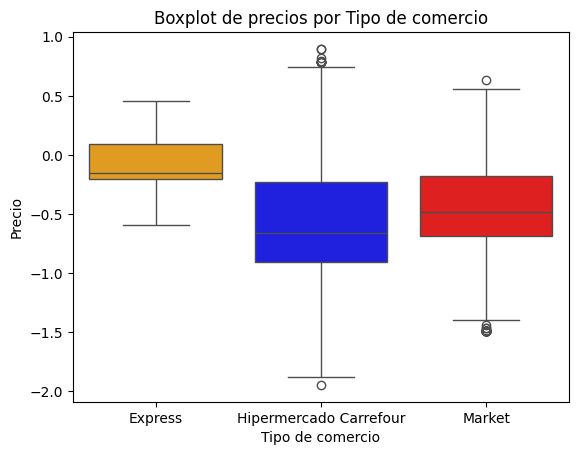

In [26]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [27]:
productos_df['productos_marca'].value_counts().loc[lambda x: x > 0]

productos_marca
CACHAMATE            1011
CBSE                  912
AMANDA                751
CARREFOUR             630
UNION                 623
TARAGUI               586
LA TRANQUERA          576
CRUZ DE MALTA         570
LA MERCED             528
NOBLEZA GAUCHA        458
VERDEFLOR             424
PLAYADITO             370
CARREFOUR CLASSIC     340
ROSAMONTE             303
ROMANCE               295
SALUS                 269
ARROYO VERDE          266
ARREGUI               252
MANANITA              244
CHAMIGO               227
BULNEZ                180
DICOMERE              124
LA CUMBRECITA         118
NATURA                106
BUENAS Y SANTAS       105
MELTAIM                77
CANARIAS               72
SALAM                  61
CACHAMAI               61
SECADERO               60
LAS MARIAS             39
Name: count, dtype: int64

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_70348/2429043445.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()


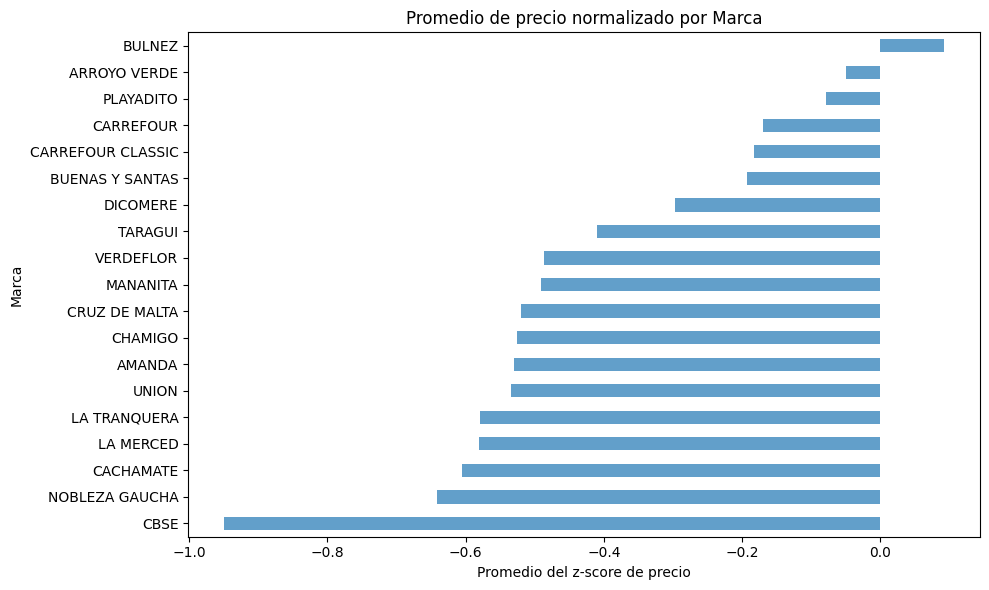

In [28]:
productos_df_en_varias_sucursales['productos_marca'] = productos_df_en_varias_sucursales['productos_marca'].cat.remove_unused_categories()

promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
promedios.plot(kind='barh', figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Marca')
plt.title('Promedio de precio normalizado por Marca')
plt.tight_layout()
plt.show()

Analizando este último gráfico se puede observar que las marcas de Carrefour no se encuentran entre las más baratas.